In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) #makes the display bars longer and spread out 100% across the screen width

In [2]:
from vivarium import Artifact
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from db_queries import get_ids, get_outputs
import scipy.stats

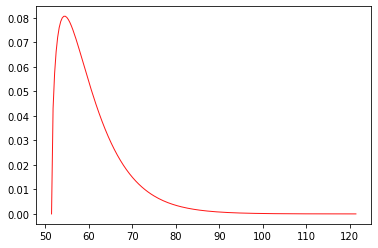

In [3]:
# distribution for the cost of BEP
loc = 51.42
mean = 60.42 - loc
a = 1.5
scale = mean/a
fig, ax = plt.subplots(1,1)
x = np.linspace(loc, loc+(120-50), 200)
ax.plot(x, scipy.stats.gamma.pdf(x, a, loc, scale), 'r-', lw=1, alpha=0.9, label='beta pdf')
plt.show()

In [4]:
%cd '/ihme/costeffectiveness/results/vivarium_gates_bep/summer_001/tanzania'
%ls

/ihme/costeffectiveness/results/vivarium_gates_bep/summer_001/tanzania
2020_07_29_17_25_00/  fig_DALYS.png  fig_ICERS_baseline.png  fig_ICERS_mmn.png


In [5]:
#run 001 and 002 

output_dirs001 = ['/ihme/costeffectiveness/results/vivarium_gates_bep/summer_001/india/2020_07_29_14_35_10/count_data/',
                  '/ihme/costeffectiveness/results/vivarium_gates_bep/summer_001/pakistan/2020_07_29_17_22_30/count_data/',
                  '/ihme/costeffectiveness/results/vivarium_gates_bep/summer_001/mali/2020_07_29_14_58_15/count_data/',
                  '/ihme/costeffectiveness/results/vivarium_gates_bep/summer_001/tanzania/2020_07_29_17_25_00/count_data/']

output_dirs002 = ['/ihme/costeffectiveness/results/vivarium_gates_bep/summer_002/india/2020_08_06_15_20_30/count_data/',
                  '/ihme/costeffectiveness/results/vivarium_gates_bep/summer_002/pakistan/2020_08_06_15_31_56/count_data/',
                  '/ihme/costeffectiveness/results/vivarium_gates_bep/summer_002/mali/2020_08_06_15_28_00/count_data/',
                  '/ihme/costeffectiveness/results/vivarium_gates_bep/summer_002/tanzania/2020_08_06_15_34_30/count_data/']

#location labels
locations = ['India','Pakistan','Mali','Tanzania']

#use in sort_values to make custum sort list. I sorted by region. 
sorter = ['India','Pakistan','Mali','Tanzania']
sorterIndex = dict(zip(sorter,range(len(sorter))))


In [6]:
%cd '/ihme/costeffectiveness/results/vivarium_gates_bep/summer_002/tanzania/2020_08_06_15_34_30/'

%ls

/ihme/costeffectiveness/results/vivarium_gates_bep/summer_002/tanzania/2020_08_06_15_34_30
branches.yaml  keyspace.yaml             output.hdf        settings.py
count_data/    logs/                     __pycache__/
final_data/    model_specification.yaml  requirements.txt


In [7]:
ylls_india002 = pd.read_hdf('/ihme/costeffectiveness/results/vivarium_gates_bep/summer_002/india/2020_08_06_15_20_30/count_data/ylls.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'ylls'})

ylls_india002

,input_draw,scenario,ylls
0,3,bep_ce_scale_up,314567.291846
1,3,bep_ce_targeted_scale_up,308853.640290
2,21,bep_ce_scale_up,300571.559849
3,21,bep_ce_targeted_scale_up,294419.135853
4,29,bep_ce_scale_up,336150.822904
5,29,bep_ce_targeted_scale_up,331229.811534
6,55,bep_ce_scale_up,314713.798230
7,55,bep_ce_targeted_scale_up,311550.328575
8,78,bep_ce_scale_up,295578.936709
9,78,bep_ce_targeted_scale_up,289339.602110


In [8]:
# check to see how many unique input draws there are

ylls_india002['input_draw'].nunique()

50

In [9]:
#treatment START HERE

treatment_india002 = pd.read_hdf('/ihme/costeffectiveness/results/vivarium_gates_bep/summer_002/india/2020_08_06_15_20_30/count_data/population.hdf').reset_index().groupby(['input_draw','scenario','treatment_group','measure']).sum().reset_index().drop(columns='index').rename(columns={'value':'population'})
treatment_india002.head(18)

#drop total_population_dead, total_population_living, total_population_tracked, total_population_untracked; only keep total population for that scenario
#scenario=all, total_population=100,000


,input_draw,scenario,treatment_group,measure,population
0,3,bep_ce_scale_up,all,total_population,100000.0
1,3,bep_ce_scale_up,all,total_population_dead,3587.0
2,3,bep_ce_scale_up,all,total_population_living,96413.0
3,3,bep_ce_scale_up,all,total_population_tracked,100000.0
4,3,bep_ce_scale_up,all,total_population_untracked,0.0
5,3,bep_ce_scale_up,bep,total_population,79789.0
6,3,bep_ce_scale_up,ifa,total_population,0.0
7,3,bep_ce_scale_up,mmn,total_population,0.0
8,3,bep_ce_scale_up,none,total_population,20211.0
9,3,bep_ce_targeted_scale_up,all,total_population,100000.0


In [10]:
treatment_india002 = treatment_india002.where(treatment_india002['measure'] == 'total_population').dropna()
treatment_india002.head(18)

#make treatment group into columns next 

,input_draw,scenario,treatment_group,measure,population
0,3.0,bep_ce_scale_up,all,total_population,100000.0
5,3.0,bep_ce_scale_up,bep,total_population,79789.0
6,3.0,bep_ce_scale_up,ifa,total_population,0.0
7,3.0,bep_ce_scale_up,mmn,total_population,0.0
8,3.0,bep_ce_scale_up,none,total_population,20211.0
9,3.0,bep_ce_targeted_scale_up,all,total_population,100000.0
14,3.0,bep_ce_targeted_scale_up,bep,total_population,13485.0
15,3.0,bep_ce_targeted_scale_up,ifa,total_population,0.0
16,3.0,bep_ce_targeted_scale_up,mmn,total_population,66304.0
17,3.0,bep_ce_targeted_scale_up,none,total_population,20211.0


In [11]:
treatment_india002 = pd.pivot_table(treatment_india002, index=['input_draw','scenario'], columns='treatment_group', values='population').reset_index()
treatment_india002.head()

treatment_group,input_draw,scenario,all,bep,ifa,mmn,none
0,3.0,bep_ce_scale_up,100000.0,79789.0,0.0,0.0,20211.0
1,3.0,bep_ce_targeted_scale_up,100000.0,13485.0,0.0,66304.0,20211.0
2,21.0,bep_ce_scale_up,100000.0,79082.0,0.0,0.0,20918.0
3,21.0,bep_ce_targeted_scale_up,100000.0,13942.0,0.0,65140.0,20918.0
4,29.0,bep_ce_scale_up,100000.0,79759.0,0.0,0.0,20241.0


In [12]:
treatment_india002 = treatment_india002.rename(columns={'all':'total_population',
                               'bep':'bep_population',
                               'ifa':'ifa_population',
                               'mmn':'mmn_population',
                               'none':'untreated_population'})

treatment_india002.head()

treatment_group,input_draw,scenario,total_population,bep_population,ifa_population,mmn_population,untreated_population
0,3.0,bep_ce_scale_up,100000.0,79789.0,0.0,0.0,20211.0
1,3.0,bep_ce_targeted_scale_up,100000.0,13485.0,0.0,66304.0,20211.0
2,21.0,bep_ce_scale_up,100000.0,79082.0,0.0,0.0,20918.0
3,21.0,bep_ce_targeted_scale_up,100000.0,13942.0,0.0,65140.0,20918.0
4,29.0,bep_ce_scale_up,100000.0,79759.0,0.0,0.0,20241.0


# DALYS_TOT TABLE 




|   .input_draw.   |   .scenario.   |   .DALYS.   |   .PERSON-TIME.   |   .TOTAL_POP.   |   .IFA_POP.   |   .MMN_POP.   |   .BEP_POP.   |   .UNTREATED_POP.

In [13]:
# EXPLORE CURRENT EVIDENCE SCENARIOS :Runs for second round of BEP changes (Current Evidence effect sizes) /share/costeffectiveness/results/vivarium_gates_bep/summer_002/

run002 = pd.DataFrame()

#ylls
ylls_india002 = pd.read_hdf('/ihme/costeffectiveness/results/vivarium_gates_bep/summer_002/india/2020_08_06_15_20_30/count_data/ylls.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'ylls'})

#ylds
ylds_india002 = pd.read_hdf('/ihme/costeffectiveness/results/vivarium_gates_bep/summer_002/india/2020_08_06_15_20_30/count_data/ylds.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'ylds'})

#dalys
dalys_india002 = ylls_india002.merge(ylds_india002, right_on=['input_draw','scenario'], left_on=['input_draw','scenario'])
dalys_india002['dalys'] = dalys_india002['ylls'] + dalys_india002['ylds']
dalys_india002 = dalys_india002.drop(columns=['ylls','ylds'])

#person-time
person_time_india002 = pd.read_hdf('/ihme/costeffectiveness/results/vivarium_gates_bep/summer_002/india/2020_08_06_15_20_30/count_data/person_time.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'person_time'})

#treatment
treatment_india002 = pd.read_hdf('/ihme/costeffectiveness/results/vivarium_gates_bep/summer_002/india/2020_08_06_15_20_30/count_data/population.hdf').reset_index().groupby(['input_draw','scenario','treatment_group','measure']).sum().reset_index().drop(columns='index').rename(columns={'value':'population'})
treatment_india002 = treatment_india002.where(treatment_india002['measure'] == 'total_population').dropna()
treatment_india002 = pd.pivot_table(treatment_india002, index=['input_draw','scenario'], columns='treatment_group', values='population').reset_index()
treatment_india002 = treatment_india002.rename(columns={'all':'total_population',
                               'bep':'bep_population',
                               'ifa':'ifa_population',
                               'mmn':'mmn_population',
                               'none':'untreated_population'})
    
dalys_pt_india002 = dalys_india002.merge(person_time_india002, right_on=['input_draw','scenario'], 
                          left_on=['input_draw','scenario'])
dalys_tot_india002 = dalys_pt_india002.merge(treatment_india002, right_on=['input_draw','scenario'], 
                          left_on=['input_draw','scenario'])

dalys_tot_india002.head()

,input_draw,scenario,dalys,person_time,total_population,bep_population,ifa_population,mmn_population,untreated_population
0,3,bep_ce_scale_up,315429.957465,193476.933607,100000.0,79789.0,0.0,0.0,20211.0
1,3,bep_ce_targeted_scale_up,309716.873022,193607.679671,100000.0,13485.0,0.0,66304.0,20211.0
2,21,bep_ce_scale_up,302238.587044,193817.604381,100000.0,79082.0,0.0,0.0,20918.0
3,21,bep_ce_targeted_scale_up,296087.503362,193957.650924,100000.0,13942.0,0.0,65140.0,20918.0
4,29,bep_ce_scale_up,337917.387572,193122.899384,100000.0,79759.0,0.0,0.0,20241.0


In [14]:
#COST scenario --bep_ce_scale_up-- only

dalys_bep_ce_scale_up_india002 = dalys_tot_india002.where(dalys_tot_india002['scenario'] == 'bep_ce_scale_up').dropna().drop(columns='scenario') 
dalys_bep_ce_scale_up_india002.head()                                            


,input_draw,dalys,person_time,total_population,bep_population,ifa_population,mmn_population,untreated_population
0,3.0,315429.957465,193476.933607,100000.0,79789.0,0.0,0.0,20211.0
2,21.0,302238.587044,193817.604381,100000.0,79082.0,0.0,0.0,20918.0
4,29.0,337917.387572,193122.899384,100000.0,79759.0,0.0,0.0,20241.0
6,55.0,316561.650808,193504.347707,100000.0,79166.0,0.0,0.0,20834.0
8,78.0,297632.751720,193911.723477,100000.0,79211.0,0.0,0.0,20789.0


In [15]:
np.random.seed(12345) 
dalys_bep_ce_scale_up_india002['costA'] = dalys_bep_ce_scale_up_india002['bep_population'] * 1.5 / dalys_bep_ce_scale_up_india002['total_population'] * 100_000
dalys_bep_ce_scale_up_india002['costB'] = dalys_bep_ce_scale_up_india002['bep_population'] * 1.5
dalys_bep_ce_scale_up_india002.head()   

,input_draw,dalys,person_time,total_population,bep_population,ifa_population,mmn_population,untreated_population,costA,costB
0,3.0,315429.957465,193476.933607,100000.0,79789.0,0.0,0.0,20211.0,119683.5,119683.5
2,21.0,302238.587044,193817.604381,100000.0,79082.0,0.0,0.0,20918.0,118623.0,118623.0
4,29.0,337917.387572,193122.899384,100000.0,79759.0,0.0,0.0,20241.0,119638.5,119638.5
6,55.0,316561.650808,193504.347707,100000.0,79166.0,0.0,0.0,20834.0,118749.0,118749.0
8,78.0,297632.751720,193911.723477,100000.0,79211.0,0.0,0.0,20789.0,118816.5,118816.5


In [16]:
ylls.sort_values('input_draw').head(6)

NameError: name 'ylls' is not defined

In [ ]:
ylls['input_draw'].nunique()

In [17]:
# ALL COUNTRIES, run001 (baseline, mmn, bep_scale_up_hd, bep_universal_hd)

master_avg = pd.DataFrame()
master_draws = pd.DataFrame()
master_counts = pd.DataFrame()

for i in list(range(len(output_dirs001))):
    #count data set for ylls
    ylls_001 = pd.read_hdf(output_dirs001[i] + 'ylls.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'ylls'})
    ylls_002 = pd.read_hdf(output_dirs002[i] + 'ylls.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'ylls'})
    ylls = ylls_001.append(ylls_002)
    
    #count data set for ylds
    ylds_001 = pd.read_hdf(output_dirs001[i] + 'ylds.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'ylds'})
    ylds_002 = pd.read_hdf(output_dirs002[i] + 'ylds.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'ylds'})
    ylds = ylds_001.append(ylds_002)
    
    #create dalys by adding ylls and ylds
    dalys = ylls.merge(ylds, right_on=['input_draw','scenario'], left_on=['input_draw','scenario'])
    dalys['dalys'] = dalys['ylls'] + dalys['ylds']
    dalys = dalys.drop(columns=['ylls','ylds'])
    
    #count data set for person_time
    person_time_001 = pd.read_hdf(output_dirs001[i] + 'person_time.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'person_time'})
    person_time_002 = pd.read_hdf(output_dirs002[i] + 'person_time.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'person_time'})
    person_time = person_time_001.append(person_time_002)
    
    #count data set for population numbers
    treatment_001 = pd.read_hdf(output_dirs001[i] + 'population.hdf').reset_index().groupby(['input_draw','scenario','treatment_group','measure']).sum().reset_index().drop(columns='index').rename(columns={'value':'population'})
    treatment_002 = pd.read_hdf(output_dirs002[i] + 'population.hdf').reset_index().groupby(['input_draw','scenario','treatment_group','measure']).sum().reset_index().drop(columns='index').rename(columns={'value':'population'})
    treatment = treatment_001.append(treatment_002)
    
    treatment = treatment.where(treatment['measure'] == 'total_population').dropna()
    treatment = pd.pivot_table(treatment, index=['input_draw','scenario'], columns='treatment_group', values='population').reset_index()
    treatment = treatment.rename(columns={'all':'total_population',
                               'bep':'bep_population',
                               'ifa':'ifa_population',
                               'mmn':'mmn_population',
                               'none':'untreated_population'})
    
    dalys_pt = dalys.merge(person_time, right_on=['input_draw','scenario'], left_on=['input_draw','scenario'])
    dalys_tot = dalys_pt.merge(treatment, right_on=['input_draw','scenario'], left_on=['input_draw','scenario'])
    
    #DALYS_TOT TABLE
    count = dalys_tot
    
    #MASTER_COUNTS
    
    count['location'] = locations[i]
    master_counts = master_counts.append(count)
    
    #master_counts consists of columns: 
    # -input_draw
    # -scenarios
    # -dalys
    # -person-time
    # -total_pop
    # -bep_pop
    # -ifa_pop
    # -mmn_pop
    # -untreated_pop

#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
#USING DALYS_TOTS
#dalys_tots['scenario']
#  bep_targeted_scale_up       50
#  mmn_scale_up                50
#  baseline                    50
#  bep_scale_up                50
#  bep_ce_scale_up             50
#  bep_ce_targeted_scale_up    50

    # add cost data
    
    
    # ---A) COST FOR BASELINE SCENARIO
    
    #1. select for baseline row
    dalys_baseline = pd.DataFrame.copy(dalys_tot.where(dalys_tot['scenario'] == 'baseline').dropna().drop(columns='scenario'))
    #2. create cost column
    dalys_baseline['cost'] = 2.69 * dalys_baseline['ifa_population']
    #3. drop person-time
    #dalys_baseline = dalys_baseline.drop(columns='person_time')   #dalys are out of 100,000 births  
    
    
    # ---B) COST FOR MMN SCENARIO
    
    #1. select for mmn row
    dalys_mmn = pd.DataFrame.copy(dalys_tot.where(dalys_tot['scenario'] == 'mmn_scale_up').dropna().drop(columns='scenario'))
    
    #2. create cost column
    dalys_mmn['cost'] = 3.69 * dalys_mmn['mmn_population'] 
    
    #3. drop person-time
    dalys_mmn = dalys_mmn.drop(columns='person_time')  #dalys are out of 100,000 births
        
        
    # ---C) COST FOR ce universal SCENARIO (current evidence effect, with f only)
    
    #1. select for bep_ce_scale_up (universal) row
    dalys_bep_ce_universal = pd.DataFrame.copy(dalys_tot.where(dalys_tot['scenario'] == 'bep_ce_scale_up').dropna().drop(columns='scenario'))
    
    #2. create cost column
    np.random.seed(12345)
    dalys_bep_ce_universal['cost_bep_ce_universal'] =  dalys_bep_ce_universal['bep_population'] * scipy.stats.gamma.rvs(a, loc, scale, size=len(dalys_bep_ce_universal['person_time']))
    dalys_bep_ce_universal['cost_bep_ce_universal_avg'] = 60.42 *  dalys_bep_ce_universal['bep_population']
    dalys_bep_ce_universal['cost_bep_ce_universal_low'] = 51.42 *  dalys_bep_ce_universal['bep_population'] 
    dalys_bep_ce_universal['cost_bep_ce_universal_high'] = 120.42 *  dalys_bep_ce_universal['bep_population'] 
        #3. drop person time, no need for pt
    dalys_bep_ce_universal = dalys_bep_ce_universal.drop(columns='person_time') #dalys are out of 100,000 births
    
    
    # ---D) COST FOR ce targeted SCENARIO (current evidence effect, with f only)
    
    #1. select for targeted row
    dalys_bep_ce_targeted = pd.DataFrame.copy(dalys_tot.where(dalys_tot['scenario'] == 'bep_ce_targeted_scale_up').dropna().drop(columns='scenario'))
    
    #2. create targeted cost column
    np.random.seed(12345)
    dalys_bep_ce_targeted['cost_bep_ce_targeted'] = ((dalys_bep_ce_targeted['bep_population'] * scipy.stats.gamma.rvs(a, loc, scale, size=len(dalys_bep_ce_targeted['person_time'])) +  dalys_bep_ce_targeted['mmn_population'] * 3.69))
    dalys_bep_ce_targeted['cost_bep_ce_targeted_avg'] = (60.42 *  dalys_bep_ce_targeted['bep_population'] + dalys_bep_ce_targeted['mmn_population'] * 3.69)  
    dalys_bep_ce_targeted['cost_bep_ce_targeted_low'] = (51.42 *  dalys_bep_ce_targeted['bep_population'] +  dalys_bep_ce_targeted['mmn_population'] * 3.69) 
    dalys_bep_ce_targeted['cost_bep_ce_targeted_high'] = (120.42 *  dalys_bep_ce_targeted['bep_population'] +  dalys_bep_ce_targeted['mmn_population'] * 3.69) 
    #3. drop person time, no need for pt                                    
    dalys_bep_ce_targeted = dalys_bep_ce_targeted.drop(columns='person_time') #dalys are out of 100,000 births
    
    
    # ---E) COST FOR hd universal SCENARIO (hopes and dreams effect, with f only)
    
    #1. select for bep hd universal row
    dalys_bep_hd_universal = pd.DataFrame.copy(dalys_tot.where(dalys_tot['scenario'] == 'bep_scale_up').dropna().drop(columns='scenario'))
    
    #2. create cost column
    np.random.seed(12345)
    dalys_bep_hd_universal['cost_bep_hd_universal'] =  dalys_bep_hd_universal['bep_population'] * scipy.stats.gamma.rvs(a, loc, scale, size=len(dalys_bep_hd_universal['person_time']))
    dalys_bep_hd_universal['cost_bep_hd_universal_avg'] = 60.42 *  dalys_bep_hd_universal['bep_population']
    dalys_bep_hd_universal['cost_bep_hd_universal_low'] = 51.42 *  dalys_bep_hd_universal['bep_population'] 
    dalys_bep_hd_universal['cost_bep_hd_universal_high'] = 120.42 *  dalys_bep_hd_universal['bep_population'] 
    #3. drop person time, no need for pt
    dalys_bep_hd_universal =  dalys_bep_hd_universal.drop(columns='person_time') #dalys are out of 100,000 births
    
    
    # ---F) COST FOR hd targeted SCENARIO (hopes and dreams effect, with f only)
    
    #1. select for targeted row
    dalys_bep_hd_targeted = pd.DataFrame.copy(dalys_tot.where(dalys_tot['scenario'] == 'bep_targeted_scale_up').dropna().drop(columns='scenario'))
    
    #2. create targeted cost column for hd
    np.random.seed(12345)
    dalys_bep_hd_targeted['cost_bep_hd_targeted'] = ((dalys_bep_hd_targeted['bep_population'] * scipy.stats.gamma.rvs(a, loc, scale, size=len(dalys_bep_hd_targeted['person_time'])) + dalys_bep_hd_targeted['mmn_population'] * 3.69))
    dalys_bep_hd_targeted['cost_bep_hd_targeted_avg'] = (60.42 * dalys_bep_hd_targeted['bep_population'] + dalys_bep_hd_targeted['mmn_population'] * 3.69)  
    dalys_bep_hd_targeted['cost_bep_hd_targeted_low'] = (51.42 * dalys_bep_hd_targeted['bep_population'] + dalys_bep_hd_targeted['mmn_population'] * 3.69) 
    dalys_bep_hd_targeted['cost_bep_hd_targeted_high'] = (120.42 * dalys_bep_hd_targeted['bep_population'] + dalys_bep_hd_targeted['mmn_population'] * 3.69) 

    #3. drop person time, no need for pt                                    
    dalys_bep_hd_targeted = dalys_bep_hd_targeted.drop(columns='person_time') #dalys are out of 100,000 births
    
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
    
    # merging the cost tables back together                                                
    #scenario 1 is baseline
    dalys_scenariosB = dalys_baseline.merge(dalys_mmn, right_on=['input_draw'], left_on=['input_draw'], suffixes=['_baseline','_mmn']) #mmn
    dalys_scenariosC = dalys_baseline.merge(dalys_bep_ce_universal, right_on=['input_draw'], left_on=['input_draw'], suffixes=['_baseline','_bep_ce_universal']) #bep current evidence universal bep_ce
    dalys_scenariosD = dalys_baseline.merge(dalys_bep_ce_targeted, right_on=['input_draw'], left_on=['input_draw'], suffixes=['_baseline','_bep_ce_targeted'])
    dalys_scenariosE = dalys_baseline.merge(dalys_bep_hd_universal, right_on=['input_draw'], left_on=['input_draw'], suffixes=['_baseline','_bep_hd_universal'])
    dalys_scenariosF = dalys_baseline.merge(dalys_bep_hd_targeted, right_on=['input_draw'], left_on=['input_draw'], suffixes=['_baseline','_bep_hd_targeted'])
   
    dalys_scenarios1 = dalys_scenariosB.merge(dalys_scenariosC, right_on=['input_draw'], left_on=['input_draw'], suffixes=['','_drop'])
    dalys_scenarios2  = dalys_scenariosD.merge(dalys_scenarios1, right_on=['input_draw'],  left_on=['input_draw'], suffixes=['','_drop'])
    dalys_scenarios3  = dalys_scenariosE.merge(dalys_scenarios2, right_on=['input_draw'],  left_on=['input_draw'], suffixes=['','_drop'])
    dalys_scenarios  = dalys_scenariosF.merge(dalys_scenarios3, right_on=['input_draw'],  left_on=['input_draw'], suffixes=['','_drop'])
    dalys_scenarios  = dalys_scenarios.drop(columns=[c for c in dalys_scenarios.columns if 'drop' in c])
    
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
   
    #calculating DALYs averted and cost diff relative to BASELINE
    
    #-------- RELATIVE TO BASELINE ---------#
    
    # B: mmn vs baseline
    dalys_scenarios['dalys_averted_mmn'] = dalys_scenarios['dalys_mmn'] - dalys_scenarios['dalys_baseline']
    dalys_scenarios['cost_diff_mmn'] = dalys_scenarios['cost_mmn'] - dalys_scenarios['cost_baseline']
    
    #  C: bep ce_universal vs baseline
    dalys_scenarios['dalys_averted_bep_ce_universal'] = dalys_scenarios['dalys_bep_ce_universal'] - dalys_scenarios['dalys_baseline'] #dalys_bep_ce_universal
    dalys_scenarios['cost_diff_bep_ce_universal'] = dalys_scenarios['cost_bep_ce_universal'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_ce_universal_avg'] = dalys_scenarios['cost_bep_ce_universal_avg'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_ce_universal_low'] = dalys_scenarios['cost_bep_ce_universal_low'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_ce_universal_high'] = dalys_scenarios['cost_bep_ce_universal_high'] - dalys_scenarios['cost_baseline']
    
    #  D: bep ce_targeted vs baseline
    dalys_scenarios['dalys_averted_bep_ce_targeted'] = dalys_scenarios['dalys_bep_ce_targeted'] - dalys_scenarios['dalys_baseline'] #dalys_bep_ce_targeted 
    dalys_scenarios['cost_diff_bep_ce_targeted'] = dalys_scenarios['cost_bep_ce_targeted'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_ce_targeted_low'] = dalys_scenarios['cost_bep_ce_targeted_low'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_ce_targeted_high'] = dalys_scenarios['cost_bep_ce_targeted_high'] - dalys_scenarios['cost_baseline']
    
    #  E: bep hd_universal vs baseline 
    dalys_scenarios['dalys_averted_bep_hd_universal'] = dalys_scenarios['dalys_bep_hd_universal'] - dalys_scenarios['dalys_baseline']  #dalys_bep_hd_universal
    dalys_scenarios['cost_diff_bep_hd_universal'] = dalys_scenarios['cost_bep_hd_universal'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_hd_universal_avg'] = dalys_scenarios['cost_bep_hd_universal_avg'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_hd_universal_low'] = dalys_scenarios['cost_bep_hd_universal_low'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_hd_universal_high'] = dalys_scenarios['cost_bep_hd_universal_high'] - dalys_scenarios['cost_baseline']
    
    #  F: bep hd_targeted vs baseline
    dalys_scenarios['dalys_averted_bep_hd_targeted'] = dalys_scenarios['dalys_bep_hd_targeted'] - dalys_scenarios['dalys_baseline']  #dalys_bep_hd_targeted
    dalys_scenarios['cost_diff_bep_hd_targeted'] = dalys_scenarios['cost_bep_hd_targeted'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_hd_targeted_low'] = dalys_scenarios['cost_bep_hd_targeted_low'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_hd_targeted_high'] = dalys_scenarios['cost_bep_hd_targeted_high'] - dalys_scenarios['cost_baseline']
    
    #-------- RELATIVE TO MMN ---------#
    
    # C and E: bep ce/hd universal relative to mmn
    dalys_scenarios['dalys_averted_bep_ce_universal_rel_to_mmn'] = dalys_scenarios['dalys_bep_ce_universal'] - dalys_scenarios['dalys_mmn']
    dalys_scenarios['dalys_averted_bep_hd_universal_rel_to_mmn'] = dalys_scenarios['dalys_bep_hd_universal'] - dalys_scenarios['dalys_mmn']
    
    dalys_scenarios['cost_diff_bep_ce_universal_rel_to_mmn'] = dalys_scenarios['cost_bep_ce_universal'] - dalys_scenarios['cost_mmn']
    dalys_scenarios['cost_diff_bep_hd_universal_rel_to_mmn'] = dalys_scenarios['cost_bep_hd_universal'] - dalys_scenarios['cost_mmn']
    
    # D and F: bep ce/hd targeted relative to mmn
    dalys_scenarios['dalys_averted_bep_ce_targeted_rel_to_mmn'] = dalys_scenarios['dalys_bep_ce_targeted'] - dalys_scenarios['dalys_mmn']
    dalys_scenarios['dalys_averted_bep_hd_targeted_rel_to_mmn'] = dalys_scenarios['dalys_bep_hd_targeted'] - dalys_scenarios['dalys_mmn']
    
    dalys_scenarios['cost_diff_bep_ce_targeted_rel_to_mmn'] = dalys_scenarios['cost_bep_ce_targeted'] - dalys_scenarios['cost_mmn']
    dalys_scenarios['cost_diff_bep_hd_targeted_rel_to_mmn'] = dalys_scenarios['cost_bep_hd_targeted'] - dalys_scenarios['cost_mmn']

    
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
   
    #ICER REL TO BASELINE
    
    
    dalys_scenarios['icer_mmn'] = dalys_scenarios['cost_diff_mmn'] / dalys_scenarios['dalys_averted_mmn']
    
    # _ce_universal
    dalys_scenarios['icer_bep_ce_universal'] = dalys_scenarios['cost_diff_bep_ce_universal'] / dalys_scenarios['dalys_averted_bep_ce_universal']
    dalys_scenarios['icer_bep_ce_universal_low'] = dalys_scenarios['cost_diff_bep_ce_universal_low'] / dalys_scenarios['dalys_averted_bep_ce_universal']
    dalys_scenarios['icer_bep_ce_universal_high'] = dalys_scenarios['cost_diff_bep_ce_universal_high'] / dalys_scenarios['dalys_averted_bep_ce_universal']
    
    # _ce_targeted
    dalys_scenarios['icer_bep_ce_targeted'] = dalys_scenarios['cost_diff_bep_ce_targeted'] / dalys_scenarios['dalys_averted_bep_ce_targeted']
    dalys_scenarios['icer_bep_ce_targeted_low'] = dalys_scenarios['cost_diff_bep_ce_targeted_low'] / dalys_scenarios['dalys_averted_bep_ce_targeted']
    dalys_scenarios['icer_bep_ce_targeted_high'] = dalys_scenarios['cost_diff_bep_ce_targeted_high'] / dalys_scenarios['dalys_averted_bep_ce_targeted']
    
    # _hd_universal
    dalys_scenarios['icer_bep_hd_universal'] = dalys_scenarios['cost_diff_bep_hd_universal'] / dalys_scenarios['dalys_averted_bep_hd_universal']
    dalys_scenarios['icer_bep_hd_universal_low'] = dalys_scenarios['cost_diff_bep_hd_universal_low'] / dalys_scenarios['dalys_averted_bep_hd_universal']
    dalys_scenarios['icer_bep_hd_universal_high'] = dalys_scenarios['cost_diff_bep_hd_universal_high'] / dalys_scenarios['dalys_averted_bep_hd_universal']
    
    # _hd_targeted
    dalys_scenarios['icer_bep_hd_targeted'] = dalys_scenarios['cost_diff_bep_hd_targeted'] / dalys_scenarios['dalys_averted_bep_hd_targeted']
    dalys_scenarios['icer_bep_hd_targeted_low'] = dalys_scenarios['cost_diff_bep_hd_targeted_low'] / dalys_scenarios['dalys_averted_bep_hd_targeted']
    dalys_scenarios['icer_bep_hd_targeted_high'] = dalys_scenarios['cost_diff_bep_hd_targeted_high'] / dalys_scenarios['dalys_averted_bep_hd_targeted']
    
    
    #ICER REL TO MMN
    
    
    #  _ce_universal
    dalys_scenarios['icer_bep_ce_universal_rel_to_mmn'] = dalys_scenarios['cost_diff_bep_ce_universal_rel_to_mmn'] / dalys_scenarios['dalys_averted_bep_ce_universal_rel_to_mmn']
    
    # _ce_targeted
    dalys_scenarios['icer_bep_ce_targeted_rel_to_mmn'] = dalys_scenarios['cost_diff_bep_ce_targeted_rel_to_mmn'] / dalys_scenarios['dalys_averted_bep_ce_targeted_rel_to_mmn']
    
    # _hd_universal
    dalys_scenarios['icer_bep_hd_universal_rel_to_mmn'] = dalys_scenarios['cost_diff_bep_hd_universal_rel_to_mmn'] / dalys_scenarios['dalys_averted_bep_hd_universal_rel_to_mmn']

    # _hd_targeted
    dalys_scenarios['icer_bep_hd_targeted_rel_to_mmn'] = dalys_scenarios['cost_diff_bep_hd_targeted_rel_to_mmn'] / dalys_scenarios['dalys_averted_bep_hd_targeted_rel_to_mmn']
    
    dalys_scenarios = dalys_scenarios.set_index(['input_draw'])
    dalys_scenarios['location'] = locations[i]
    
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#  
    #appending each country (dalys_scenarios) together to create master_draws (keep master draws as is)
    
    master_draws = master_draws.append(dalys_scenarios.reset_index())

#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
  # USING DALYS_SCENARIOS  
    
    #per country 
    dalys_prep = dalys_scenarios.reset_index().drop(columns=['input_draw','person_time']) #no need for person time, drop
    
    #averaging over the 50 draws
    dalys_mean = pd.DataFrame(dalys_prep.mean()) #mean over all 50 input draw rows
    dalys_min = pd.DataFrame(dalys_prep.quantile(0.025))
    dalys_max = pd.DataFrame(dalys_prep.quantile(0.975))
    
    per_pt1 = dalys_mean.merge(dalys_min, right_index=True, left_index=True)
    #per_pt2 = dalys_mean.merge(dalys_max, right_index=True, left_index=True)
    
    final_per_pt = per_pt1.merge(dalys_max, right_index=True, left_index=True)#, suffixes=['','_drop'])
    final_per_pt = final_per_pt.rename(columns={0.0:'mean', 0.025:'min', 0.975:'max'})#.drop(columns='0.0_mean_drop')
    final_per_pt = final_per_pt.reset_index()
    
    final_per_pt['location'] = locations[i]
    
  #----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
    #appending all 4 countries    
    master_avg = master_avg.append(final_per_pt)
  #----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
    
# perform lexicographic sort on a dataframe  
master_avg['location_rank'] = master_avg['location'].map(sorterIndex)
master_avg = master_avg.sort_values(by='location_rank')

#master_avg.drop('location_rank', 1, inplace = True)
master_avg.head(5)
    

,index,mean,min,max,location,location_rank
0,dalys_baseline,3.167964e+05,2.964863e+05,3.362000e+05,India,0
72,cost_diff_bep_hd_targeted,9.796099e+05,8.224443e+05,1.265729e+06,India,0
71,dalys_averted_bep_hd_targeted,-1.372696e+04,-1.667119e+04,-1.019353e+04,India,0
70,cost_diff_bep_hd_universal_high,9.471676e+06,9.375874e+06,9.572571e+06,India,0
69,cost_diff_bep_hd_universal_low,3.992001e+06,3.953761e+06,4.035712e+06,India,0


In [18]:
# CHECK OUT MASTER DRAWS

master_draws_t = master_draws.T
master_draws.to_csv('/homes/nicoly/bep_results_data/ouputs_bydraws.csv', index=False)
master_draws_t.to_csv('/homes/nicoly/bep_results_data/ouputs_bydraws_t.csv', index=False)

master_draws_t.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
input_draw,3,21,29,55,78,100,146,155,157,177,...,733,758,766,804,829,845,891,946,973,990
dalys_baseline,315430,302239,337917,316562,297633,322348,320765,318382,316572,306326,...,360787,482021,410165,391363,387531,437858,366303,428923,459506,372965
person_time,193477,193818,193123,193504,193912,193401,193424,193479,193489,193692,...,193304,191041,192362,192736,192689,191818,193123,191907,191489,192994
total_population_baseline,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,...,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
bep_population_baseline,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TESTING AND EXPLORING DATA

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [19]:
# check dalys in bep_ce_universal vs baseline

dalys_bep_ce_universal1 = master_avg[master_avg['index'].isin(['dalys_bep_ce_universal', 'dalys_averted_bep_ce_universal','dalys_baseline'])]
dalys_bep_ce_universal1 


,index,mean,min,max,location,location_rank
0,dalys_baseline,3.167964e+05,2.964863e+05,3.362000e+05,India,0
57,dalys_averted_bep_ce_universal,7.683411e-11,-1.164153e-10,2.779416e-10,India,0
45,dalys_bep_ce_universal,3.167964e+05,2.964863e+05,3.362000e+05,India,0
57,dalys_averted_bep_ce_universal,-1.396984e-11,-1.746230e-10,1.615263e-10,Pakistan,1
0,dalys_baseline,4.474724e+05,3.804415e+05,5.340641e+05,Pakistan,1
45,dalys_bep_ce_universal,4.474724e+05,3.804415e+05,5.340641e+05,Pakistan,1
57,dalys_averted_bep_ce_universal,1.629815e-11,-4.394678e-10,3.492460e-10,Mali,2
0,dalys_baseline,7.216033e+05,6.188091e+05,8.728576e+05,Mali,2
45,dalys_bep_ce_universal,7.216033e+05,6.188091e+05,8.728576e+05,Mali,2
57,dalys_averted_bep_ce_universal,1.094304e-10,0.000000e+00,2.779416e-10,Tanzania,3


In [20]:
#CHECKING BEP CE UNIVERSAL (DALYS seem to be the same as baseline)

output_dirs001 = ['/ihme/costeffectiveness/results/vivarium_gates_bep/summer_001/india/2020_07_29_14_35_10/count_data/',
                  '/ihme/costeffectiveness/results/vivarium_gates_bep/summer_001/pakistan/2020_07_29_17_22_30/count_data/',
                  '/ihme/costeffectiveness/results/vivarium_gates_bep/summer_001/mali/2020_07_29_14_58_15/count_data/',
                  '/ihme/costeffectiveness/results/vivarium_gates_bep/summer_001/tanzania/2020_07_29_17_25_00/count_data/']

output_dirs002 = ['/ihme/costeffectiveness/results/vivarium_gates_bep/summer_002/india/2020_08_06_15_20_30/count_data/',
                  '/ihme/costeffectiveness/results/vivarium_gates_bep/summer_002/pakistan/2020_08_06_15_31_56/count_data/',
                  '/ihme/costeffectiveness/results/vivarium_gates_bep/summer_002/mali/2020_08_06_15_28_00/count_data/',
                  '/ihme/costeffectiveness/results/vivarium_gates_bep/summer_002/tanzania/2020_08_06_15_34_30/count_data/']

#location labels
locations = ['India','Pakistan','Mali','Tanzania']

#use in sort_values to make custum sort list. I sorted by region. 
sorter = ['India','Pakistan','Mali','Tanzania']
sorterIndex = dict(zip(sorter,range(len(sorter))))


for i in list(range(len(output_dirs001))):
    #count data set for ylls
    ylls_001 = pd.read_hdf(output_dirs001[i] + 'ylls.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'ylls'})
    ylls_002 = pd.read_hdf(output_dirs002[i] + 'ylls.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'ylls'})
    ylls = ylls_001.append(ylls_002)
    
    #count data set for ylds
    ylds_001 = pd.read_hdf(output_dirs001[i] + 'ylds.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'ylds'})
    ylds_002 = pd.read_hdf(output_dirs002[i] + 'ylds.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'ylds'})
    ylds = ylds_001.append(ylds_002)
    
    #create dalys by adding ylls and ylds
    dalys = ylls.merge(ylds, right_on=['input_draw','scenario'], left_on=['input_draw','scenario'])
    dalys['dalys'] = dalys['ylls'] + dalys['ylds']
    dalys = dalys.drop(columns=['ylls','ylds'])

dalys_bep_ce_universal2 = dalys[dalys['scenario'].isin(['baseline', 'bep_ce_scale_up'])]
dalys_bep_ce_universal2 = dalys_bep_ce_universal2.groupby('scenario').dalys.mean().reset_index()
dalys_bep_ce_universal2 

,scenario,dalys
0,baseline,406860.633901
1,bep_ce_scale_up,406860.633901


In [21]:
master_avg_india = master_avg.where(master_avg['location'] == 'India').dropna()
master_avg_india

,index,mean,min,max,location,location_rank
0,dalys_baseline,3.167964e+05,2.964863e+05,3.362000e+05,India,0.0
72,cost_diff_bep_hd_targeted,9.796099e+05,8.224443e+05,1.265729e+06,India,0.0
71,dalys_averted_bep_hd_targeted,-1.372696e+04,-1.667119e+04,-1.019353e+04,India,0.0
70,cost_diff_bep_hd_universal_high,9.471676e+06,9.375874e+06,9.572571e+06,India,0.0
69,cost_diff_bep_hd_universal_low,3.992001e+06,3.953761e+06,4.035712e+06,India,0.0
68,cost_diff_bep_hd_universal_avg,4.706741e+06,4.660993e+06,4.757819e+06,India,0.0
67,cost_diff_bep_hd_universal,4.794457e+06,4.081687e+06,6.492430e+06,India,0.0
66,dalys_averted_bep_hd_universal,-2.399584e+04,-2.928687e+04,-1.822716e+04,India,0.0
65,cost_diff_bep_ce_targeted_high,1.770850e+06,1.637131e+06,1.929999e+06,India,0.0
64,cost_diff_bep_ce_targeted_low,8.431923e+05,7.828381e+05,9.112078e+05,India,0.0


In [22]:
dalys_scenarios_list =  dalys_scenarios.T
dalys_scenarios_list.reset_index().head()


input_draw,index,3.0,21.0,29.0,55.0,78.0,100.0,146.0,155.0,157.0,...,733.0,758.0,766.0,804.0,829.0,845.0,891.0,946.0,973.0,990.0
0,dalys_baseline,424948,430676,470238,454546,439090,413791,473641,458894,508247,...,360787,482021,410165,391363,387531,437858,366303,428923,459506,372965
1,person_time,191962,191926,191251,191506,191813,192236,191170,191421,190563,...,193304,191041,192362,192736,192689,191818,193123,191907,191489,192994
2,total_population_baseline,100000,100000,100000,100000,100000,100000,100000,100000,100000,...,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
3,bep_population_baseline,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ifa_population_baseline,21285,24758,22620,20149,20344,21563,20898,20035,19540,...,19478,19709,23248,20490,20929,19886,21190,19639,23193,20015


In [23]:
dalys_tot['scenario'].value_counts()

bep_ce_scale_up             50
bep_scale_up                50
bep_targeted_scale_up       50
mmn_scale_up                50
bep_ce_targeted_scale_up    50
baseline                    50
Name: scenario, dtype: int64

In [24]:
#one country tanzania only 

dalys_scenarios.head()

,dalys_baseline,person_time,total_population_baseline,bep_population_baseline,ifa_population_baseline,mmn_population_baseline,untreated_population_baseline,location_baseline,cost,dalys_bep_hd_targeted,...,icer_bep_hd_universal_low,icer_bep_hd_universal_high,icer_bep_hd_targeted,icer_bep_hd_targeted_low,icer_bep_hd_targeted_high,icer_bep_ce_universal_rel_to_mmn,icer_bep_ce_targeted_rel_to_mmn,icer_bep_hd_universal_rel_to_mmn,icer_bep_hd_targeted_rel_to_mmn,location
input_draw,,,,,,,,,,,,,,,,,,,,,
3.0,424947.811612,191962.294319,100000.0,0.0,21285.0,0.0,78715.0,Tanzania,57256.65,419154.355495,...,-199.233945,-469.978982,-124.937231,-116.515932,-217.476911,1588.328046,860.013474,-241.820236,-161.745863,Tanzania
21.0,430676.004034,191925.842574,100000.0,0.0,24758.0,0.0,75242.0,Tanzania,66599.02,420223.500966,...,-169.475825,-400.280536,-73.271065,-64.470673,-121.835880,960.014194,360.425695,-244.806353,-99.544324,Tanzania
29.0,470237.874750,191250.754278,100000.0,0.0,22620.0,0.0,77380.0,Tanzania,60847.80,461718.855019,...,-138.949059,-327.920902,-93.312665,-74.709673,-137.416184,2553.535295,1001.545943,-201.521554,-85.902046,Tanzania
55.0,454546.482283,191505.659138,100000.0,0.0,20149.0,0.0,79851.0,Tanzania,54200.81,448213.255643,...,-158.255651,-373.184394,-122.003777,-104.797336,-194.331792,2355.010510,633.799090,-206.649354,-123.830967,Tanzania
78.0,439089.935521,191812.605065,100000.0,0.0,20344.0,0.0,79656.0,Tanzania,54725.36,430113.641654,...,-186.978156,-440.940402,-98.070000,-79.060708,-149.641954,1666.907812,494.636131,-285.942634,-111.515519,Tanzania


In [25]:
dalys_prep.head()


,dalys_baseline,total_population_baseline,bep_population_baseline,ifa_population_baseline,mmn_population_baseline,untreated_population_baseline,location_baseline,cost,dalys_bep_hd_targeted,total_population_bep_hd_targeted,...,icer_bep_hd_universal_low,icer_bep_hd_universal_high,icer_bep_hd_targeted,icer_bep_hd_targeted_low,icer_bep_hd_targeted_high,icer_bep_ce_universal_rel_to_mmn,icer_bep_ce_targeted_rel_to_mmn,icer_bep_hd_universal_rel_to_mmn,icer_bep_hd_targeted_rel_to_mmn,location
0,424947.811612,100000.0,0.0,21285.0,0.0,78715.0,Tanzania,57256.65,419154.355495,100000.0,...,-199.233945,-469.978982,-124.937231,-116.515932,-217.476911,1588.328046,860.013474,-241.820236,-161.745863,Tanzania
1,430676.004034,100000.0,0.0,24758.0,0.0,75242.0,Tanzania,66599.02,420223.500966,100000.0,...,-169.475825,-400.280536,-73.271065,-64.470673,-121.835880,960.014194,360.425695,-244.806353,-99.544324,Tanzania
2,470237.874750,100000.0,0.0,22620.0,0.0,77380.0,Tanzania,60847.80,461718.855019,100000.0,...,-138.949059,-327.920902,-93.312665,-74.709673,-137.416184,2553.535295,1001.545943,-201.521554,-85.902046,Tanzania
3,454546.482283,100000.0,0.0,20149.0,0.0,79851.0,Tanzania,54200.81,448213.255643,100000.0,...,-158.255651,-373.184394,-122.003777,-104.797336,-194.331792,2355.010510,633.799090,-206.649354,-123.830967,Tanzania
4,439089.935521,100000.0,0.0,20344.0,0.0,79656.0,Tanzania,54725.36,430113.641654,100000.0,...,-186.978156,-440.940402,-98.070000,-79.060708,-149.641954,1666.907812,494.636131,-285.942634,-111.515519,Tanzania


In [26]:
#MASTER_DRAW one country tanzania only 

master_draws.head()

,input_draw,dalys_baseline,person_time,total_population_baseline,bep_population_baseline,ifa_population_baseline,mmn_population_baseline,untreated_population_baseline,location_baseline,cost,...,icer_bep_hd_universal_low,icer_bep_hd_universal_high,icer_bep_hd_targeted,icer_bep_hd_targeted_low,icer_bep_hd_targeted_high,icer_bep_ce_universal_rel_to_mmn,icer_bep_ce_targeted_rel_to_mmn,icer_bep_hd_universal_rel_to_mmn,icer_bep_hd_targeted_rel_to_mmn,location
0,3.0,315429.957465,193476.933607,100000.0,0.0,35192.0,0.0,64808.0,India,94666.48,...,-166.303501,-394.735374,-66.635901,-61.020617,-128.340933,495.495777,248.741905,-275.532776,-138.468182,India
1,21.0,302238.587044,193817.604381,100000.0,0.0,39783.0,0.0,60217.0,India,107016.27,...,-190.197929,-452.321041,-74.908361,-63.829319,-136.047872,499.904881,264.482270,-397.832983,-198.517542,India
2,29.0,337917.387572,193122.899384,100000.0,0.0,36533.0,0.0,63467.0,India,98273.77,...,-142.507487,-338.431670,-74.916924,-56.752359,-117.981033,773.956990,390.853128,-258.276481,-125.089563,India
3,55.0,316561.650808,193504.347707,100000.0,0.0,32773.0,0.0,67227.0,India,88159.37,...,-156.191623,-370.423257,-77.049310,-63.736343,-133.010937,915.851354,374.438080,-238.721053,-103.577010,India
4,78.0,297632.751720,193911.723477,100000.0,0.0,32504.0,0.0,67496.0,India,87435.76,...,-201.788241,-478.506235,-103.223813,-79.401852,-167.852475,729.104708,988.906529,-418.646719,-236.569869,India


In [27]:
#one country tanzania only 

dalys_prep.head()

,dalys_baseline,total_population_baseline,bep_population_baseline,ifa_population_baseline,mmn_population_baseline,untreated_population_baseline,location_baseline,cost,dalys_bep_hd_targeted,total_population_bep_hd_targeted,...,icer_bep_hd_universal_low,icer_bep_hd_universal_high,icer_bep_hd_targeted,icer_bep_hd_targeted_low,icer_bep_hd_targeted_high,icer_bep_ce_universal_rel_to_mmn,icer_bep_ce_targeted_rel_to_mmn,icer_bep_hd_universal_rel_to_mmn,icer_bep_hd_targeted_rel_to_mmn,location
0,424947.811612,100000.0,0.0,21285.0,0.0,78715.0,Tanzania,57256.65,419154.355495,100000.0,...,-199.233945,-469.978982,-124.937231,-116.515932,-217.476911,1588.328046,860.013474,-241.820236,-161.745863,Tanzania
1,430676.004034,100000.0,0.0,24758.0,0.0,75242.0,Tanzania,66599.02,420223.500966,100000.0,...,-169.475825,-400.280536,-73.271065,-64.470673,-121.835880,960.014194,360.425695,-244.806353,-99.544324,Tanzania
2,470237.874750,100000.0,0.0,22620.0,0.0,77380.0,Tanzania,60847.80,461718.855019,100000.0,...,-138.949059,-327.920902,-93.312665,-74.709673,-137.416184,2553.535295,1001.545943,-201.521554,-85.902046,Tanzania
3,454546.482283,100000.0,0.0,20149.0,0.0,79851.0,Tanzania,54200.81,448213.255643,100000.0,...,-158.255651,-373.184394,-122.003777,-104.797336,-194.331792,2355.010510,633.799090,-206.649354,-123.830967,Tanzania
4,439089.935521,100000.0,0.0,20344.0,0.0,79656.0,Tanzania,54725.36,430113.641654,100000.0,...,-186.978156,-440.940402,-98.070000,-79.060708,-149.641954,1666.907812,494.636131,-285.942634,-111.515519,Tanzania


In [28]:
dalys_mean.head()

,0
dalys_baseline,406860.633901
total_population_baseline,100000.000000
bep_population_baseline,0.000000
ifa_population_baseline,20972.020000
mmn_population_baseline,0.000000


# NUMBER SUPPLEMENTED IN SCENARIOS   ==============================================================================

In [29]:
# number of treated individuals in each scenario/location per 100,000 births
treated_numbers = master_counts
treated_numbers['treated'] = (treated_numbers['bep_population']+treated_numbers['ifa_population']+treated_numbers['mmn_population'])/treated_numbers['total_population']*100_000
treated_counts = treated_numbers.groupby(['scenario','location']).mean().reset_index()
treated_counts = treated_counts[['scenario','location','treated']]
treated_counts

,scenario,location,treated
0,baseline,India,34032.92
1,baseline,Mali,23286.76
2,baseline,Pakistan,24710.06
3,baseline,Tanzania,20972.02
4,bep_ce_scale_up,India,79415.58
5,bep_ce_scale_up,Mali,75111.36
6,bep_ce_scale_up,Pakistan,75913.44
7,bep_ce_scale_up,Tanzania,88484.38
8,bep_ce_targeted_scale_up,India,79415.58
9,bep_ce_targeted_scale_up,Mali,75111.36


# ==================================================================================================================



.

In [30]:
prep = master_avg.where(master_avg['index'] != 'icer_bep_targeted_rel_to_bep').dropna()

prep['val'] = prep['mean'].map(int).map(str) + ' (' + prep['min'].map(int).map(str) + ', ' + prep['max'].map(int).map(str) + ')'
prep['measure'] = np.where(prep['index'].str.contains('dalys_averted'), 'dalys', 'drop')
prep['measure'] = np.where(prep['index'].str.contains('cost'), 'cost', prep['measure'])
prep['measure'] = np.where(prep['index'].str.contains('icer'), 'icer', prep['measure'])
prep = prep.where(prep['measure'] != 'drop').dropna()
prep['scenario'] = np.where(prep['index'] == 'cost_baseline', 'baseline', 'na')
prep['scenario'] = np.where(prep['index'] == 'cost_mmn', 'mmn_scale_up', prep['scenario'])
prep['scenario'] = np.where(prep['index'] == 'cost_bep', 'bep_scale_up', prep['scenario'])
prep['scenario'] = np.where(prep['index'] == 'cost_bep_targeted', 'bep_targeted_scale_up', prep['scenario'])
prep['scenario'] = np.where(prep['index'] == 'icer_baseline', 'baseline', prep['scenario'])
prep['scenario'] = np.where(prep['index'] == 'icer_mmn', 'mmn_scale_up', prep['scenario'])
prep['scenario'] = np.where(prep['index'] == 'icer_bep', 'bep_scale_up', prep['scenario'])
prep['scenario'] = np.where(prep['index'] == 'icer_bep_targeted', 'bep_targeted_scale_up', prep['scenario'])
prep['scenario'] = np.where(prep['index'] == 'icer_bep_rel_to_mmn', 'bep_scale_up', prep['scenario'])
prep['scenario'] = np.where(prep['index'] == 'icer_bep_targeted_rel_to_mmn', 'bep_targeted_scale_up', prep['scenario'])
prep['scenario'] = np.where(prep['index'] == ('dalys_averted_baseline'), 'baseline', prep['scenario'])
prep['scenario'] = np.where(prep['index'] == ('dalys_averted_mmn'), 'mmn_scale_up', prep['scenario'])
prep['scenario'] = np.where(prep['index'] == ('dalys_averted_bep'), 'bep_scale_up', prep['scenario'])
prep['scenario'] = np.where(prep['index'] == ('dalys_averted_bep_targeted'), 'bep_targeted_scale_up', prep['scenario'])
prep = prep.where(prep['scenario'] != 'na').dropna()
prep['comparator'] = np.where(prep['index'].str.contains('rel_to_mmn'), 'mmn', 'baseline')
prep.where(prep['comparator'] == 'mmn').dropna()
prep = prep.drop(columns=['index','mean','min','max'])
dalys = prep.where(prep['measure'].str.contains('dalys')).dropna().rename(columns={'val':'dalys_averted'}).drop(columns=['measure','comparator'])
cost = prep.where(prep['measure'] == 'cost').dropna().rename(columns={'val':'cost'}).drop(columns=['measure','comparator'])
icer_baseline = prep.where(prep['measure'] == 'icer').where(prep['comparator'] == 'baseline').dropna().rename(columns={'val':'icer_baseline'}).drop(columns=['measure','comparator'])
icer_mmn = prep.where(prep['measure'] == 'icer').where(prep['comparator'] == 'mmn').dropna().rename(columns={'val':'icer_mmn'}).drop(columns=['measure','comparator'])
merged = dalys.merge(cost, right_on=['location','scenario'], left_on=['location','scenario'], how='outer')
merged = merged.merge(icer_baseline,right_on=['location','scenario'], left_on=['location','scenario'], how='outer')
merged = merged.merge(icer_mmn, right_on=['location','scenario'], left_on=['location','scenario'], how='outer')
merged = treated_counts.merge(merged, right_on=['location','scenario'], left_on=['location','scenario'], how = 'outer')
merged['order'] = np.where(merged['scenario'] == 'mmn_scale_up', 2, 1)
merged['order'] = np.where(merged['scenario'] == 'bep_scale_up', 3, merged['order'])
merged['order'] = np.where(merged['scenario'] == 'bep_targeted_scale_up', 4, merged['order'])
merged = merged.sort_values(by=['location','order'])
merged = merged.set_index(['location','scenario']).drop(columns='order')
merged['treated'] = merged['treated'].map(int)
merged

OverflowError: cannot convert float infinity to integer

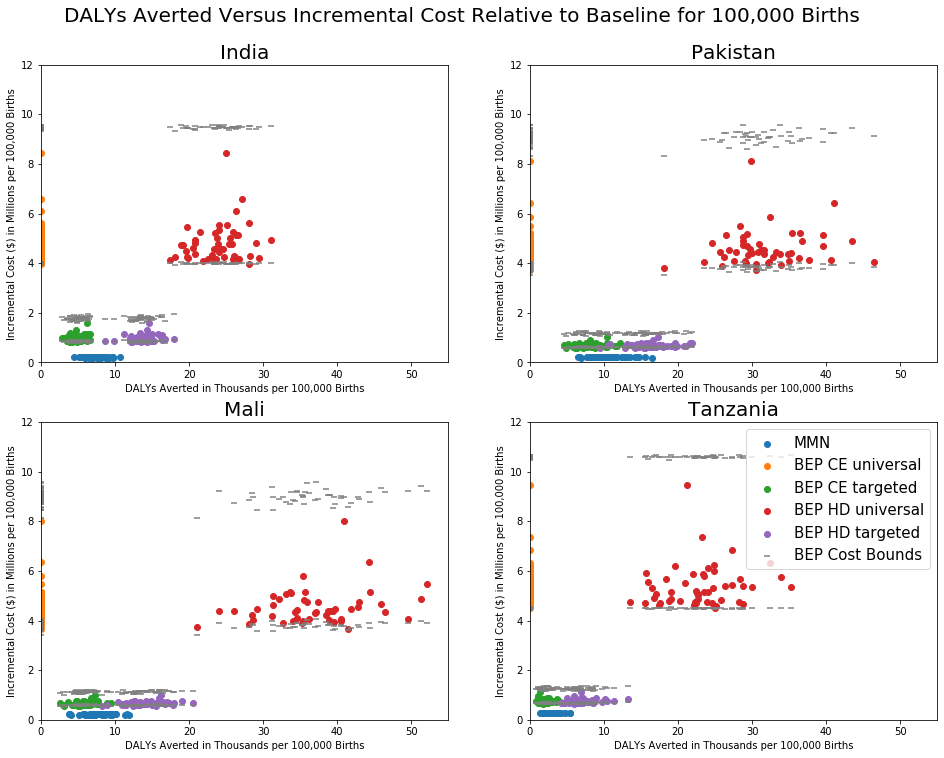

In [31]:
fig, axs = plt.subplots(2,2)

india = master_draws.where(master_draws['location'] == 'India').dropna()
pakistan = master_draws.where(master_draws['location'] == 'Pakistan').dropna()
mali = master_draws.where(master_draws['location'] == 'Mali').dropna()
tanzania = master_draws.where(master_draws['location'] == 'Tanzania').dropna()

#------------------------INDIA---------------------------------------------------------------------------------------------------------------------------------------#

#mmn 
axs[0,0].scatter(india['dalys_averted_mmn']*(-1)/1_000, india['cost_diff_mmn']/1_000_000)
#bep ce_universal
axs[0,0].scatter(india['dalys_averted_bep_ce_universal']*(-1)/1_000, india['cost_diff_bep_ce_universal']/1_000_000)
#bep ce_targeted
axs[0,0].scatter(india['dalys_averted_bep_ce_targeted']*(-1)/1_000, india['cost_diff_bep_ce_targeted']/1_000_000)
#bep hd_universal
axs[0,0].scatter(india['dalys_averted_bep_hd_universal']*(-1)/1_000, india['cost_diff_bep_hd_universal']/1_000_000)
#bep hd_targeted
axs[0,0].scatter(india['dalys_averted_bep_hd_targeted']*(-1)/1_000, india['cost_diff_bep_hd_targeted']/1_000_000)

#cost bounds for BEP
axs[0,0].scatter(india['dalys_averted_bep_ce_universal']*(-1)/1_000, india['cost_diff_bep_ce_universal_low']/1_000_000,marker='_',c='grey')
axs[0,0].scatter(india['dalys_averted_bep_ce_universal']*(-1)/1_000, india['cost_diff_bep_ce_universal_high']/1_000_000,marker='_',c='grey')
axs[0,0].scatter(india['dalys_averted_bep_ce_targeted']*(-1)/1_000, india['cost_diff_bep_ce_targeted_low']/1_000_000,marker='_',c='grey')
axs[0,0].scatter(india['dalys_averted_bep_ce_targeted']*(-1)/1_000, india['cost_diff_bep_ce_targeted_high']/1_000_000,marker='_',c='grey')
axs[0,0].scatter(india['dalys_averted_bep_hd_universal']*(-1)/1_000, india['cost_diff_bep_hd_universal_low']/1_000_000,marker='_',c='grey')
axs[0,0].scatter(india['dalys_averted_bep_hd_universal']*(-1)/1_000, india['cost_diff_bep_hd_universal_high']/1_000_000,marker='_',c='grey')
axs[0,0].scatter(india['dalys_averted_bep_hd_targeted']*(-1)/1_000, india['cost_diff_bep_hd_targeted_low']/1_000_000,marker='_',c='grey')
axs[0,0].scatter(india['dalys_averted_bep_hd_targeted']*(-1)/1_000, india['cost_diff_bep_hd_targeted_high']/1_000_000,marker='_',c='grey')

axs[0,0].set_title('India',fontsize=20)
axs[0,0].set_xlim(0,55)
axs[0,0].set_ylim(0,12)

#------------------------PAKISTAN---------------------------------------------------------------------------------------------------------------------------------------#

#mmn 
axs[0,1].scatter(pakistan['dalys_averted_mmn']*(-1)/1_000, pakistan['cost_diff_mmn']/1_000_000)
#bep ce_universal
axs[0,1].scatter(pakistan['dalys_averted_bep_ce_universal']*(-1)/1_000, pakistan['cost_diff_bep_ce_universal']/1_000_000)
#bep ce_targeted
axs[0,1].scatter(pakistan['dalys_averted_bep_ce_targeted']*(-1)/1_000, pakistan['cost_diff_bep_ce_targeted']/1_000_000)
#bep hd_universal
axs[0,1].scatter(pakistan['dalys_averted_bep_hd_universal']*(-1)/1_000, pakistan['cost_diff_bep_hd_universal']/1_000_000)
#bep hd_targeted
axs[0,1].scatter(pakistan['dalys_averted_bep_hd_targeted']*(-1)/1_000, pakistan['cost_diff_bep_hd_targeted']/1_000_000)

#BEP cost bounds
axs[0,1].scatter(pakistan['dalys_averted_bep_ce_universal']*(-1)/1_000, pakistan['cost_diff_bep_ce_universal_low']/1_000_000,marker='_',c='grey')
axs[0,1].scatter(pakistan['dalys_averted_bep_ce_universal']*(-1)/1_000, pakistan['cost_diff_bep_ce_universal_high']/1_000_000,marker='_',c='grey')
axs[0,1].scatter(pakistan['dalys_averted_bep_ce_targeted']*(-1)/1_000, pakistan['cost_diff_bep_ce_targeted_low']/1_000_000,marker='_',c='grey')
axs[0,1].scatter(pakistan['dalys_averted_bep_ce_targeted']*(-1)/1_000, pakistan['cost_diff_bep_ce_targeted_high']/1_000_000,marker='_',c='grey')
axs[0,1].scatter(pakistan['dalys_averted_bep_hd_universal']*(-1)/1_000, pakistan['cost_diff_bep_hd_universal_low']/1_000_000,marker='_',c='grey')
axs[0,1].scatter(pakistan['dalys_averted_bep_hd_universal']*(-1)/1_000, pakistan['cost_diff_bep_hd_universal_high']/1_000_000,marker='_',c='grey')
axs[0,1].scatter(pakistan['dalys_averted_bep_hd_targeted']*(-1)/1_000, pakistan['cost_diff_bep_hd_targeted_low']/1_000_000,marker='_',c='grey')
axs[0,1].scatter(pakistan['dalys_averted_bep_hd_targeted']*(-1)/1_000, pakistan['cost_diff_bep_hd_targeted_high']/1_000_000,marker='_',c='grey')

axs[0,1].set_title('Pakistan',fontsize=20)
axs[0,1].set_xlim(0,55)
axs[0,1].set_ylim(0,12)


#------------------------MALI---------------------------------------------------------------------------------------------------------------------------------------#

#mmn 
axs[1,0].scatter(mali['dalys_averted_mmn']*(-1)/1_000, mali['cost_diff_mmn']/1_000_000)
#bep ce_universal
axs[1,0].scatter(mali['dalys_averted_bep_ce_universal']*(-1)/1_000, mali['cost_diff_bep_ce_universal']/1_000_000)
#bep ce_targeted
axs[1,0].scatter(mali['dalys_averted_bep_ce_targeted']*(-1)/1_000, mali['cost_diff_bep_ce_targeted']/1_000_000)
#bep hd_universal
axs[1,0].scatter(mali['dalys_averted_bep_hd_universal']*(-1)/1_000, mali['cost_diff_bep_hd_universal']/1_000_000)
#bep hd_targeted
axs[1,0].scatter(mali['dalys_averted_bep_hd_targeted']*(-1)/1_000, mali['cost_diff_bep_hd_targeted']/1_000_000)

#BEP COST BOUNDS
axs[1,0].scatter(mali['dalys_averted_bep_ce_universal']*(-1)/1_000, mali['cost_diff_bep_ce_universal_low']/1_000_000,marker='_',c='grey')
axs[1,0].scatter(mali['dalys_averted_bep_ce_universal']*(-1)/1_000, mali['cost_diff_bep_ce_universal_high']/1_000_000,marker='_',c='grey')
axs[1,0].scatter(mali['dalys_averted_bep_ce_targeted']*(-1)/1_000, mali['cost_diff_bep_ce_targeted_low']/1_000_000,marker='_',c='grey')
axs[1,0].scatter(mali['dalys_averted_bep_ce_targeted']*(-1)/1_000, mali['cost_diff_bep_ce_targeted_high']/1_000_000,marker='_',c='grey')
axs[1,0].scatter(mali['dalys_averted_bep_hd_universal']*(-1)/1_000, mali['cost_diff_bep_hd_universal_low']/1_000_000,marker='_',c='grey')
axs[1,0].scatter(mali['dalys_averted_bep_hd_universal']*(-1)/1_000, mali['cost_diff_bep_hd_universal_high']/1_000_000,marker='_',c='grey')
axs[1,0].scatter(mali['dalys_averted_bep_hd_targeted']*(-1)/1_000, mali['cost_diff_bep_hd_targeted_low']/1_000_000,marker='_',c='grey')
axs[1,0].scatter(mali['dalys_averted_bep_hd_targeted']*(-1)/1_000, mali['cost_diff_bep_hd_targeted_high']/1_000_000,marker='_',c='grey')

axs[1,0].set_title('Mali',fontsize=20)
axs[1,0].set_xlim(0,55)
axs[1,0].set_ylim(0,12)


#------------------------TANZANIA---------------------------------------------------------------------------------------------------------------------------------------#

#mmn 
axs[1,1].scatter(tanzania['dalys_averted_mmn']*(-1)/1_000, tanzania['cost_diff_mmn']/1_000_000)
#bep ce_universal
axs[1,1].scatter(tanzania['dalys_averted_bep_ce_universal']*(-1)/1_000, tanzania['cost_diff_bep_ce_universal']/1_000_000)
#bep ce_targeted
axs[1,1].scatter(tanzania['dalys_averted_bep_ce_targeted']*(-1)/1_000, tanzania['cost_diff_bep_ce_targeted']/1_000_000)
#bep hd_universal
axs[1,1].scatter(tanzania['dalys_averted_bep_hd_universal']*(-1)/1_000, tanzania['cost_diff_bep_hd_universal']/1_000_000)
#bep hd_targeted
axs[1,1].scatter(tanzania['dalys_averted_bep_hd_targeted']*(-1)/1_000, tanzania['cost_diff_bep_hd_targeted']/1_000_000)

#BEP COST BOUNDS

axs[1,1].scatter(tanzania['dalys_averted_bep_ce_universal']*(-1)/1_000, tanzania['cost_diff_bep_ce_universal_low']/1_000_000,marker='_',c='grey')
axs[1,1].scatter(tanzania['dalys_averted_bep_ce_universal']*(-1)/1_000, tanzania['cost_diff_bep_ce_universal_high']/1_000_000,marker='_',c='grey')
axs[1,1].scatter(tanzania['dalys_averted_bep_ce_targeted']*(-1)/1_000, tanzania['cost_diff_bep_ce_targeted_low']/1_000_000,marker='_',c='grey')
axs[1,1].scatter(tanzania['dalys_averted_bep_ce_targeted']*(-1)/1_000, tanzania['cost_diff_bep_ce_targeted_high']/1_000_000,marker='_',c='grey')
axs[1,1].scatter(tanzania['dalys_averted_bep_hd_universal']*(-1)/1_000, tanzania['cost_diff_bep_hd_universal_low']/1_000_000,marker='_',c='grey')
axs[1,1].scatter(tanzania['dalys_averted_bep_hd_universal']*(-1)/1_000, tanzania['cost_diff_bep_hd_universal_high']/1_000_000,marker='_',c='grey')
axs[1,1].scatter(tanzania['dalys_averted_bep_hd_targeted']*(-1)/1_000, tanzania['cost_diff_bep_hd_targeted_low']/1_000_000,marker='_',c='grey')
axs[1,1].scatter(tanzania['dalys_averted_bep_hd_targeted']*(-1)/1_000, tanzania['cost_diff_bep_hd_targeted_high']/1_000_000,marker='_',c='grey')

axs[1,1].set_title('Tanzania',fontsize=20)
axs[1,1].set_xlim(0,55)
axs[1,1].set_ylim(0,12)


for ax in axs.flat:
    ax.set(xlabel='DALYs Averted in Thousands per 100,000 Births', 
           ylabel='Incremental Cost ($) in Millions per 100,000 Births')
    #ax.label_outer()

plt.legend(['MMN','BEP CE universal','BEP CE targeted', 'BEP HD universal','BEP HD targeted', 'BEP Cost Bounds'], prop={'size': 15})
plt.suptitle('DALYs Averted Versus Incremental Cost Relative to Baseline for 100,000 Births',x=1.1,y=2.6,fontsize=20)
plt.subplots_adjust(right=2.2, top=2.4)


ValueError: shape mismatch: objects cannot be broadcast to a single shape

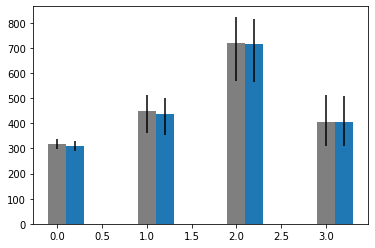

In [32]:
data = master_avg #.where(master_avg['malnourishment_category'] == 'all').dropna()

# bar width
barWidth = 0.2

# bar heights
baseline = master_avg['mean'].where(master_avg['index'] == 'dalys_baseline').dropna() / 1_000
baseline_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_baseline').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_baseline').dropna())/ 1_000
baseline_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_baseline').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_baseline').dropna())/ 1_000

mmn = master_avg['mean'].where(master_avg['index'] == 'dalys_mmn').dropna()/ 1_000
mmn_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_mmn').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_mmn').dropna())/ 1_000
mmn_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_mmn').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_mmn').dropna())/ 1_000

bep = master_avg['mean'].where(master_avg['index'] == 'dalys_bep').dropna() /1_000
bep_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_bep').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_bep').dropna())/ 1_000
bep_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_bep').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_bep').dropna())/1_000


bep_targeted = master_avg['mean'].where(master_avg['index'] == 'dalys_bep_targeted').dropna()/1_000
bep_targeted_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_bep_targeted').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_bep_targeted').dropna())/1_000
bep_targeted_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_bep_targeted').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_bep_targeted').dropna())/1_000


# bar positions
baseline_x = np.arange(len(baseline)) 
mmn_x = [x + barWidth for x in baseline_x]
bep_x = [x + barWidth for x in mmn_x]
bep_targeted_x = [x + barWidth for x in bep_x]

# plot
plt.bar(baseline_x, baseline, yerr=[baseline_upper, baseline_lower], width=barWidth, color='tab:grey')
plt.bar(mmn_x, mmn, yerr=[mmn_upper, mmn_lower], width=barWidth, color='tab:blue')
plt.bar(bep_x, bep, yerr=[bep_upper, bep_lower], width=barWidth, color='tab:orange')
plt.bar(bep_targeted_x, bep_targeted, yerr=[bep_targeted_upper, bep_targeted_lower], width=barWidth, color='tab:green')

#
plt.xticks([r + 1.5*barWidth for r in range(len(baseline))], master_avg['location'].where(master_avg['index'] == 'dalys_baseline').dropna())
plt.yticks([0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800])
plt.ylabel('DALYs (thousands) per 100,000 Births')
plt.title('DALYs in Thousands per 100,000 Births')
plt.legend(['Baseline','MMN','Universal BEP','Targeted BEP'])
#plt.savefig('fig_DALYS')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

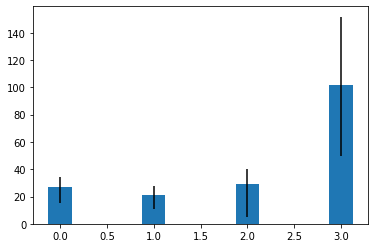

In [33]:
data = master_avg#.where(master_avg['malnourishment_category'] == 'all').dropna()*(-1)

# bar width
barWidth = 0.25

# bar heights
mmn = master_avg['mean'].where(master_avg['index'] == 'icer_mmn').dropna()*(-1)
mmn_upper =  master_avg['max'].where(master_avg['index'] == 'icer_mmn').dropna()*(-1) - master_avg['mean'].where(master_avg['index'] == 'icer_mmn').dropna()*(-1)
mmn_lower =  master_avg['mean'].where(master_avg['index'] == 'icer_mmn').dropna()*(-1) - master_avg['min'].where(master_avg['index'] == 'icer_mmn').dropna()*(-1)

bep = master_avg['mean'].where(master_avg['index'] == 'icer_bep').dropna()*(-1)
bep_upper =  (master_avg['max'].where(master_avg['index'] == 'icer_bep').dropna().values*(-1) -  master_avg['mean'].where(master_avg['index'] == 'icer_bep').dropna().values*(-1))
bep_lower =  (master_avg['mean'].where(master_avg['index'] == 'icer_bep').dropna().values*(-1) -  master_avg['min'].where(master_avg['index'] == 'icer_bep').dropna().values*(-1))

bep_targeted = master_avg['mean'].where(master_avg['index'] == 'icer_bep_targeted').dropna()*(-1)
bep_targeted_upper =  (master_avg['max'].where(master_avg['index'] == 'icer_bep_targeted').dropna().values*(-1) -  master_avg['mean'].where(master_avg['index'] == 'icer_bep_targeted').dropna().values*(-1))
bep_targeted_lower =  (master_avg['mean'].where(master_avg['index'] == 'icer_bep_targeted').dropna().values*(-1) -  master_avg['min'].where(master_avg['index'] == 'icer_bep_targeted').dropna().values*(-1))

#bep_low = master_avg['mean'].where(master_avg['index'] == 'icer_bep_low').dropna()*(-1)
#bep_low_upper =  master_avg['max'].where(master_avg['index'] == 'icer_bep_low').dropna()*(-1) -  master_avg['mean'].where(master_avg['index'] == 'icer_bep_low').dropna()*(-1)
#bep_low_lower =  master_avg['mean'].where(master_avg['index'] == 'icer_bep_low').dropna()*(-1) -  master_avg['min'].where(master_avg['index'] == 'icer_bep_low').dropna()*(-1)

#bep_targeted_high = master_avg['mean'].where(master_avg['index'] == 'icer_bep_targeted_high').dropna()*(-1)
#bep_targeted_high_upper =  master_avg['max'].where(master_avg['index'] == 'icer_bep_targeted_high').dropna()*(-1) -  master_avg['mean'].where(master_avg['index'] == 'icer_bep_targeted_high').dropna()*(-1)
#bep_targeted_high_lower =  master_avg['mean'].where(master_avg['index'] == 'icer_bep_targeted_high').dropna()*(-1) -  master_avg['min'].where(master_avg['index'] == 'icer_bep_targeted_high').dropna()*(-1)

# bar positions
mmn_x = np.arange(len(mmn)) 
bep_x = [x + barWidth for x in mmn_x]
bep_targeted_x = [x + barWidth for x in bep_x]

# plot
plt.bar(mmn_x, mmn,width=barWidth, yerr=[mmn_upper, mmn_lower])
plt.bar(bep_x, bep, yerr=[bep_upper, bep_lower], width=barWidth)
plt.bar(bep_targeted_x, bep_targeted, yerr=[bep_targeted_upper, bep_targeted_lower], width=barWidth)
plt.legend(['MMN','Universal BEP','Targeted BEP','Willingness to Pay Threshold'], loc='upper left')
threshold = 100
threshold2 = 50
threshold3 = 25
plt.plot([-0.25,len(mmn)-.25], [threshold, threshold],'k--', c='gray')
plt.plot([-0.25,len(mmn)-.25], [threshold2, threshold2],'k--', c='gray')
plt.plot([-0.25,len(mmn)-.25], [threshold3, threshold3],'k--', c='gray')

#
plt.xticks([r + barWidth for r in range(len(mmn))], master_avg['location'].where(master_avg['index'] == 'icer_mmn').dropna())
plt.ylabel('Incremental Cost ($) per DALY Averted')
plt.title('Incremental Cost per DALY Averted Relative to Baseline')
#plt.savefig('fig_ICERS_baseline')

In [ ]:
data = master_avg#.where(master_avg['malnourishment_category'] == 'all').dropna()*(-1)

# bar width
barWidth = 0.4

# bar heights
bep = master_avg['mean'].where(master_avg['index'] == 'icer_bep_rel_to_mmn').dropna()*(-1)
bep_upper =  master_avg['max'].where(master_avg['index'] == 'icer_bep_rel_to_mmn').dropna()*(-1) - master_avg['mean'].where(master_avg['index'] == 'icer_bep_rel_to_mmn').dropna()*(-1)
bep_lower =  master_avg['mean'].where(master_avg['index'] == 'icer_bep_rel_to_mmn').dropna()*(-1) - master_avg['min'].where(master_avg['index'] == 'icer_bep_rel_to_mmn').dropna()*(-1)

bep_targeted = master_avg['mean'].where(master_avg['index'] == 'icer_bep_targeted_rel_to_mmn').dropna()*(-1)
bep_targeted_upper =  master_avg['max'].where(master_avg['index'] == 'icer_bep_targeted_rel_to_mmn').dropna()*(-1) - master_avg['mean'].where(master_avg['index'] == 'icer_bep_targeted_rel_to_mmn').dropna()*(-1)
bep_targeted_lower =  master_avg['mean'].where(master_avg['index'] == 'icer_bep_targeted_rel_to_mmn').dropna()*(-1) - master_avg['min'].where(master_avg['index'] == 'icer_bep_targeted_rel_to_mmn').dropna()*(-1)

# bar positions
bep_x = np.arange(len(bep)) 
bep_targeted_x = [x + barWidth for x in bep_x]

# plot
plt.bar(bep_x, bep, yerr=[bep_upper, bep_lower], width=barWidth, color='tab:orange')
plt.bar(bep_targeted_x, bep_targeted, yerr=[bep_targeted_upper, bep_targeted_lower], width=barWidth, color='tab:green')

#
plt.xticks([r + .5*barWidth for r in range(len(bep))], master_avg['location'].where(master_avg['index'] == 'icer_mmn').dropna())
plt.ylabel('Incremental Cost ($) per DALY Averted')
plt.title('Incremental Cost per DALY Averted Relative to MMN')
plt.legend(['Universal BEP','Targeted BEP'], loc='upper center')

threshold = 100
threshold2 = 50
threshold3 = 25
plt.plot([-0.25,len(mmn)-0.33], [threshold, threshold],'k--', c='gray')
plt.plot([-0.25,len(mmn)-0.33], [threshold2, threshold2],'k--', c='gray')
plt.plot([-0.25,len(mmn)-0.33], [threshold3, threshold3],'k--', c='gray')
#plt.savefig('fig_ICERS_mmn')